In [6]:
import numpy as np
from AsbestosModels import AsbestosModels
import matplotlib.pyplot as plt

In [2]:
AM = AsbestosModels('./')

Model number 0 : PData_1Base_Train : parameters {'MD': 0, 'BT': 10, 'D': 455, 'BV': 1, 'L': 3, 'S': 0, 'E': 70}
Model number 1 : PData_1Base_Train : parameters {'MD': 0, 'BT': 10, 'D': 455, 'BV': 1, 'L': 3, 'S': 0, 'E': 70}
Model number 2 : PData_1Base_Train : parameters {'MD': 0, 'BT': 10, 'D': 455, 'BV': 1, 'L': 3, 'S': 0, 'E': 70}
Model number 3 : PData_1Base_Train : parameters {'MD': 0, 'BT': 10, 'D': 455, 'BV': 1, 'L': 3, 'S': 0, 'E': 70}
Model number 4 : PData_1Base_Train : parameters {'MD': 0, 'BT': 10, 'D': 455, 'BV': 1, 'L': 3, 'S': 0, 'E': 70}
Model number 5 : PData_1Base_Train : parameters {'MD': 0, 'BT': 10, 'D': 455, 'BV': 1, 'L': 3, 'S': 0, 'E': 70}
Model number 6 : PData_1Base_Train : parameters {'MD': 0, 'BT': 10, 'D': 455, 'BV': 1, 'L': 3, 'S': 0, 'E': 70}
Model number 7 : PData_1Base_Train : parameters {'MD': 0, 'BT': 10, 'D': 455, 'BV': 1, 'L': 1, 'S': 0, 'E': 70}
Model number 8 : PData_1Base_Train : parameters {'MD': 0, 'BT': 10, 'D': 455, 'BV': 1, 'L': 3, 'S': 0, '

In [7]:
saved_averages=[]
percentage = 0.2
for num_model in range(len(AM.models)):
    model,model_name = AM.extract_model(num_model,3)
    saved_averages.append(np.load('./Numpy Variables/'+'Validation data '+'Percentage'+str(percentage).replace('.','_')+model_name+'.npy'))

[<tf.Tensor 'input_17:0' shape=(?, ?, ?, 3) dtype=float32>, <tf.Tensor 'conv2d_170/Relu:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_31/MaxPool:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'conv2d_172/Relu:0' shape=(?, ?, ?, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_32/MaxPool:0' shape=(?, ?, ?, 64) dtype=float32>, <tf.Tensor 'conv2d_174/Relu:0' shape=(?, ?, ?, 128) dtype=float32>, <tf.Tensor 'concatenate_31/concat:0' shape=(?, ?, ?, 192) dtype=float32>, <tf.Tensor 'conv2d_176/Relu:0' shape=(?, ?, ?, 64) dtype=float32>, <tf.Tensor 'concatenate_32/concat:0' shape=(?, ?, ?, 96) dtype=float32>, <tf.Tensor 'conv2d_178/Relu:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'conv2d_179/Sigmoid:0' shape=(?, ?, ?, 1) dtype=float32>]
[<tf.Tensor 'input_18:0' shape=(?, ?, ?, 3) dtype=float32>, <tf.Tensor 'conv2d_181/Relu:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_33/MaxPool:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'conv2d_183/Relu:0' sh

[<tf.Tensor 'input_29:0' shape=(?, ?, ?, 3) dtype=float32>, <tf.Tensor 'conv2d_294/Relu:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_53/MaxPool:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'conv2d_296/Relu:0' shape=(?, ?, ?, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_54/MaxPool:0' shape=(?, ?, ?, 64) dtype=float32>, <tf.Tensor 'conv2d_298/Relu:0' shape=(?, ?, ?, 128) dtype=float32>, <tf.Tensor 'concatenate_53/concat:0' shape=(?, ?, ?, 192) dtype=float32>, <tf.Tensor 'conv2d_300/Relu:0' shape=(?, ?, ?, 64) dtype=float32>, <tf.Tensor 'concatenate_54/concat:0' shape=(?, ?, ?, 96) dtype=float32>, <tf.Tensor 'conv2d_302/Relu:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'conv2d_303/Sigmoid:0' shape=(?, ?, ?, 1) dtype=float32>]
[<tf.Tensor 'input_30:0' shape=(?, ?, ?, 3) dtype=float32>, <tf.Tensor 'conv2d_305/Relu:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_55/MaxPool:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'conv2d_307/Relu:0' sh

In [8]:
F1_pix = []
F1_obj = []
R_pix = []
R_obj = []
for num_model in range(len(AM.models)):
    f1_pix = np.zeros([len(saved_averages[0])])
    f1_obj = np.zeros([len(saved_averages[0])])
    r_pix = np.zeros([len(saved_averages[0])])
    r_obj = np.zeros([len(saved_averages[0])])
    for num_threshold in range(len(saved_averages[0])):
        r_pix[num_threshold] = saved_averages[num_model][num_threshold][1]
        r_obj[num_threshold] = saved_averages[num_model][num_threshold][3]
        f1_pix[num_threshold]=2*saved_averages[num_model][num_threshold][0]*saved_averages[num_model][num_threshold][1]/(saved_averages[num_model][num_threshold][0]+saved_averages[num_model][num_threshold][1])
        f1_obj[num_threshold]=2*saved_averages[num_model][num_threshold][3]*saved_averages[num_model][num_threshold][2]/(saved_averages[num_model][num_threshold][3]+saved_averages[num_model][num_threshold][2])
    R_pix.append(r_pix)
    R_obj.append(r_obj)
    F1_obj.append(f1_obj)
    F1_pix.append(f1_pix)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


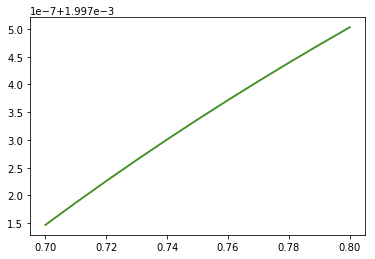

In [38]:
p = 0.001
recall = np.arange(0.7,0.8,0.01)
plt.plot(recall,0.001*recall*2/(0.001+recall))
plt.show()


In [ ]:
p = 0.001
recall = np.arange(0.7,0.8,0.01)
plt.plot(recall,0.001*recall*2/(0.001+recall))
plt.show()

In [ ]:
ordered_max_F1_obj_arg=max_F1_obj_arg[np.flip(np.argsort(max_F1_obj_arg[:,1]),axis=0),:]

In [20]:
F1_pix[5] = np.zeros(F1_obj[5].shape)

In [21]:
max_F1_obj_arg = np.zeros([len(AM.models),3])
max_F1_pix_arg = np.zeros([len(AM.models),3])
for num_model in range(len(AM.models)):
    print(num_model)
    max_F1_obj_arg[num_model,:]=([np.nanargmax(F1_obj[num_model]),F1_obj[num_model][np.nanargmax(F1_obj[num_model])],num_model])
    max_F1_pix_arg[num_model,:]=([np.nanargmax(F1_pix[num_model]),F1_pix[num_model][np.nanargmax(F1_pix[num_model])],num_model])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [28]:
for num in range(len(saved_averages)):
    saved_averages[num] = np.nan_to_num(saved_averages[num])
    F1_obj[num] = np.nan_to_num(F1_obj[num])
    F1_pix[num] = np.nan_to_num(F1_pix[num])

In [29]:
max_F1_obj_arg

array([[  1.20000000e+01,   1.17647059e-01,   0.00000000e+00],
       [  9.99000000e+02,   8.12204338e-02,   1.00000000e+00],
       [  9.99000000e+02,   2.46212121e-01,   2.00000000e+00],
       [  9.83000000e+02,   7.09796272e-02,   3.00000000e+00],
       [  8.90000000e+01,   1.25820527e-01,   4.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   5.00000000e+00],
       [  1.00000000e+00,   3.56234097e-01,   6.00000000e+00],
       [  9.91000000e+02,   8.00000000e-01,   7.00000000e+00],
       [  8.00000000e+01,   2.08791209e-01,   8.00000000e+00],
       [  3.40000000e+01,   2.00000000e-01,   9.00000000e+00],
       [  7.72000000e+02,   1.09761583e-01,   1.00000000e+01],
       [  2.00000000e+00,   1.94420477e-01,   1.10000000e+01],
       [  3.00000000e+00,   3.33333333e-01,   1.20000000e+01],
       [  1.00000000e+00,   4.80000000e-01,   1.30000000e+01],
       [  1.00000000e+00,   3.48717949e-01,   1.40000000e+01],
       [  1.57000000e+02,   1.66666667e-01,   1.5000000

In [30]:
ordered_max_F1_obj_arg=max_F1_obj_arg[np.flip(np.argsort(max_F1_obj_arg[:,1]),axis=0),:]

In [31]:
ordered_max_F1_obj_arg

array([[  9.97000000e+02,   8.00000000e-01,   1.80000000e+01],
       [  9.91000000e+02,   8.00000000e-01,   7.00000000e+00],
       [  9.92000000e+02,   5.71428571e-01,   1.90000000e+01],
       [  1.00000000e+00,   4.80000000e-01,   1.30000000e+01],
       [  9.90000000e+01,   4.19354839e-01,   1.60000000e+01],
       [  1.00000000e+00,   3.56234097e-01,   6.00000000e+00],
       [  1.00000000e+00,   3.48717949e-01,   1.40000000e+01],
       [  3.00000000e+00,   3.33333333e-01,   1.20000000e+01],
       [  9.99000000e+02,   2.46212121e-01,   2.00000000e+00],
       [  8.00000000e+01,   2.08791209e-01,   8.00000000e+00],
       [  3.40000000e+01,   2.00000000e-01,   9.00000000e+00],
       [  2.00000000e+00,   1.94420477e-01,   1.10000000e+01],
       [  1.57000000e+02,   1.66666667e-01,   1.50000000e+01],
       [  8.90000000e+01,   1.25820527e-01,   4.00000000e+00],
       [  1.20000000e+01,   1.17647059e-01,   0.00000000e+00],
       [  7.72000000e+02,   1.09761583e-01,   1.0000000

[<tf.Tensor 'input_44:0' shape=(?, ?, ?, 3) dtype=float32>, <tf.Tensor 'conv2d_399/Relu:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_68/MaxPool:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'conv2d_401/Relu:0' shape=(?, ?, ?, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_69/MaxPool:0' shape=(?, ?, ?, 64) dtype=float32>, <tf.Tensor 'conv2d_403/Relu:0' shape=(?, ?, ?, 128) dtype=float32>, <tf.Tensor 'concatenate_68/concat:0' shape=(?, ?, ?, 192) dtype=float32>, <tf.Tensor 'conv2d_405/Relu:0' shape=(?, ?, ?, 64) dtype=float32>, <tf.Tensor 'concatenate_69/concat:0' shape=(?, ?, ?, 96) dtype=float32>, <tf.Tensor 'conv2d_407/Relu:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'conv2d_408/Sigmoid:0' shape=(?, ?, ?, 1) dtype=float32>]


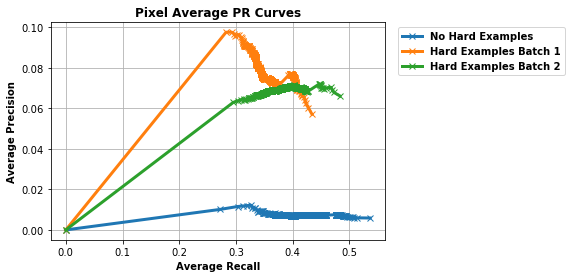

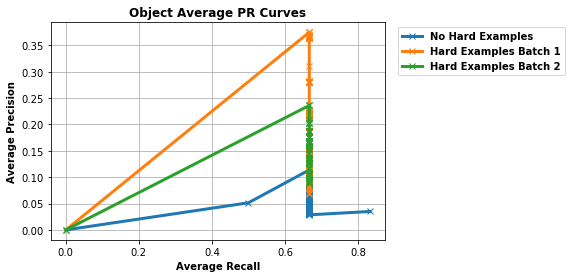

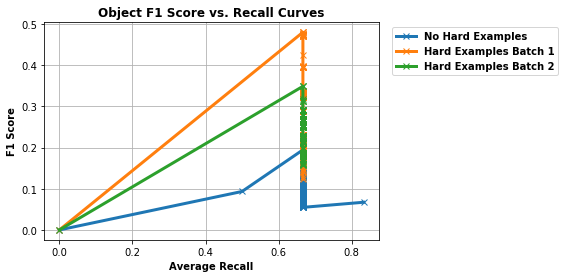

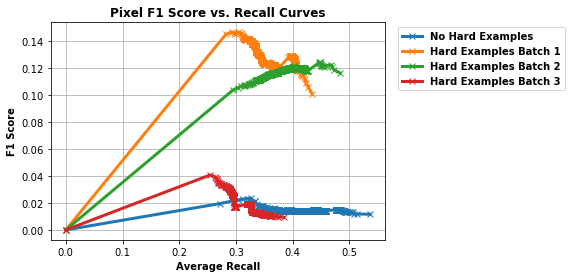

In [35]:
# Plot pix precision-recall
number = 11
number2 = 13
number3 = 14
number4 = 20
_,model_name = AM.extract_model(number,3)
plt.clf()
# plt.figure(figsize=(10,5))
plt.plot(saved_averages[number][:,1],saved_averages[number][:,0],'-x',linewidth = 3.0,label = 'No Hard Examples')
plt.plot(saved_averages[number2][:,1],saved_averages[number2][:,0],'-x',linewidth = 3.0,label = 'Hard Examples Batch 1')
plt.plot(saved_averages[number3][:,1],saved_averages[number3][:,0],'-x',linewidth = 3.0, label = 'Hard Examples Batch 2')
# plt.plot(saved_averages[number4][:,1],saved_averages[number4][:,0],'-x',linewidth = 3.0,label = 'Hard Examples Batch 3')
legend_properties = {'weight':'bold'}
plt.legend(loc='upper right',bbox_to_anchor=(1.55,1),prop=legend_properties)
plt.xlabel("Average Recall",fontweight = 'bold')
plt.ylabel("Average Precision",fontweight = 'bold')
plt.title("Pixel Average PR Curves",fontweight = 'bold')
plt.grid()
plt.savefig('Report Plot/'+model_name+'PR_PIX_'+'.png')
plt.show()

plt.plot(saved_averages[number][:,3],saved_averages[number][:,2],'-x',linewidth = 3.0,label = 'No Hard Examples')
plt.plot(saved_averages[number2][:,3],saved_averages[number2][:,2],'-x',linewidth = 3.0,label = 'Hard Examples Batch 1')
plt.plot(saved_averages[number3][:,3],saved_averages[number3][:,2],'-x',linewidth = 3.0, label = 'Hard Examples Batch 2')
# plt.plot(saved_averages[number4][:,3],saved_averages[number4][:,2],'-x',linewidth = 3.0,label = 'Hard Examples Batch 3')
legend_properties = {'weight':'bold'}
plt.legend(loc='upper right',bbox_to_anchor=(1.55,1),prop=legend_properties)
plt.xlabel("Average Recall",fontweight = 'bold')
plt.ylabel("Average Precision",fontweight = 'bold')
plt.title("Object Average PR Curves",fontweight = 'bold')
plt.grid()
plt.savefig('Report Plot/'+model_name+'PR_OBJ_'+'.png')
plt.show()

plt.plot(saved_averages[number][:,3],F1_obj[number],'-x',linewidth = 3.0,label = 'No Hard Examples')
plt.plot(saved_averages[number2][:,3],F1_obj[number2],'-x',linewidth = 3.0,label = 'Hard Examples Batch 1')
plt.plot(saved_averages[number3][:,3],F1_obj[number3],'-x',linewidth = 3.0, label = 'Hard Examples Batch 2')
# plt.plot(saved_averages[number4][:,3],F1_obj[number4],'-x',linewidth = 3.0,label = 'Hard Examples Batch 3')
legend_properties = {'weight':'bold'}
plt.legend(loc='upper right',bbox_to_anchor=(1.55,1),prop=legend_properties)
plt.xlabel("Average Recall",fontweight = 'bold')
plt.ylabel("F1 Score",fontweight = 'bold')
plt.title("Object F1 Score vs. Recall Curves",fontweight = 'bold')
plt.grid()
plt.savefig('Report Plot/'+model_name+'F1_OBJ_'+'.png')
plt.show()

plt.plot(saved_averages[number][:,1],F1_pix[number],'-x',linewidth = 3.0,label = 'No Hard Examples')
plt.plot(saved_averages[number2][:,1],F1_pix[number2],'-x',linewidth = 3.0,label = 'Hard Examples Batch 1')
plt.plot(saved_averages[number3][:,1],F1_pix[number3],'-x',linewidth = 3.0, label = 'Hard Examples Batch 2')
plt.plot(saved_averages[number4][:,1],F1_pix[number4],'-x',linewidth = 3.0,label = 'Hard Examples Batch 3')
legend_properties = {'weight':'bold'}
plt.legend(loc='upper right',bbox_to_anchor=(1.55,1),prop=legend_properties)
plt.xlabel("Average Recall",fontweight = 'bold')
plt.ylabel("F1 Score",fontweight = 'bold')
plt.title("Pixel F1 Score vs. Recall Curves",fontweight = 'bold')
plt.grid()
plt.savefig('Report Plot/'+model_name+'F1_PIX_'+'.png')
plt.show()

[<tf.Tensor 'input_43:0' shape=(?, ?, ?, 3) dtype=float32>, <tf.Tensor 'conv2d_396/Relu:0' shape=(?, ?, ?, 32) dtype=float32>, <tf.Tensor 'conv2d_397/Sigmoid:0' shape=(?, ?, ?, 1) dtype=float32>]


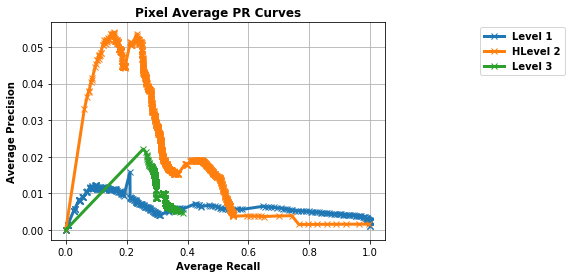

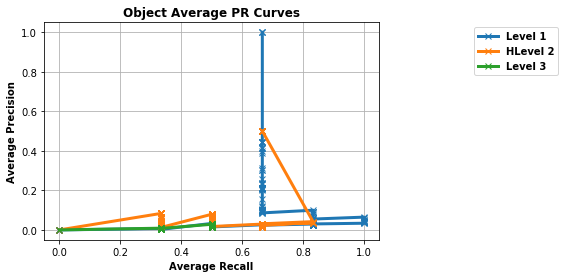

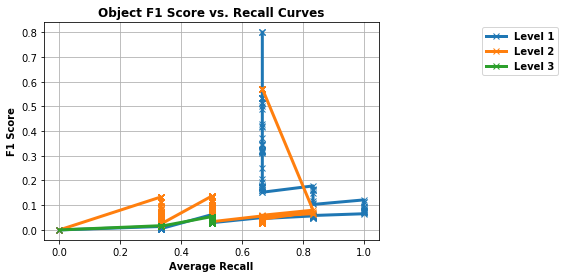

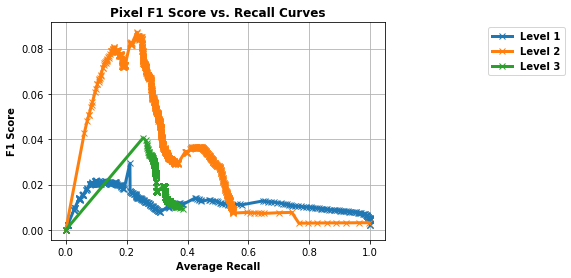

In [34]:
# Plot pix precision-recall
number = 18
number2 = 19
number3 = 20
number4 = 20
_,model_name = AM.extract_model(number,3)
plt.clf()
# plt.figure(figsize=(10,5))
plt.plot(saved_averages[number][:,1],saved_averages[number][:,0],'-x',linewidth = 3.0,label = 'Level 1')
plt.plot(saved_averages[number2][:,1],saved_averages[number2][:,0],'-x',linewidth = 3.0,label = 'Level 2')
plt.plot(saved_averages[number3][:,1],saved_averages[number3][:,0],'-x',linewidth = 3.0, label = 'Level 3')
# plt.plot(saved_averages[number4][:,1],saved_averages[number4][:,0],'-x',linewidth = 3.0,label = 'Hard Examples Batch 3')
legend_properties = {'weight':'bold'}
plt.legend(loc='upper right',bbox_to_anchor=(1.55,1),prop=legend_properties)
plt.xlabel("Average Recall",fontweight = 'bold')
plt.ylabel("Average Precision",fontweight = 'bold')
plt.title("Pixel Average PR Curves",fontweight = 'bold')
plt.grid()
plt.savefig('Report Plot/'+model_name+'PR_PIX_'+'.png')
plt.show()

plt.plot(saved_averages[number][:,3],saved_averages[number][:,2],'-x',linewidth = 3.0,label = 'Level 1')
plt.plot(saved_averages[number2][:,3],saved_averages[number2][:,2],'-x',linewidth = 3.0,label = 'Level 2')
plt.plot(saved_averages[number3][:,3],saved_averages[number3][:,2],'-x',linewidth = 3.0, label = 'Level 3')
# plt.plot(saved_averages[number4][:,3],saved_averages[number4][:,2],'-x',linewidth = 3.0,label = 'Hard Examples Batch 3')
legend_properties = {'weight':'bold'}
plt.legend(loc='upper right',bbox_to_anchor=(1.55,1),prop=legend_properties)
plt.xlabel("Average Recall",fontweight = 'bold')
plt.ylabel("Average Precision",fontweight = 'bold')
plt.title("Object Average PR Curves",fontweight = 'bold')
plt.grid()
plt.savefig('Report Plot/'+model_name+'PR_OBJ_'+'.png')
plt.show()

plt.plot(saved_averages[number][:,3],F1_obj[number],'-x',linewidth = 3.0,label = 'Level 1')
plt.plot(saved_averages[number2][:,3],F1_obj[number2],'-x',linewidth = 3.0,label = 'Level 2')
plt.plot(saved_averages[number3][:,3],F1_obj[number3],'-x',linewidth = 3.0, label = 'Level 3')
# plt.plot(saved_averages[number4][:,3],F1_obj[number4],'-x',linewidth = 3.0,label = 'Hard Examples Batch 3')
legend_properties = {'weight':'bold'}
plt.legend(loc='upper right',bbox_to_anchor=(1.55,1),prop=legend_properties)
plt.xlabel("Average Recall",fontweight = 'bold')
plt.ylabel("F1 Score",fontweight = 'bold')
plt.title("Object F1 Score vs. Recall Curves",fontweight = 'bold')
plt.grid()
plt.savefig('Report Plot/'+model_name+'F1_OBJ_'+'.png')
plt.show()

plt.plot(saved_averages[number][:,1],F1_pix[number],'-x',linewidth = 3.0,label = 'Level 1')
plt.plot(saved_averages[number2][:,1],F1_pix[number2],'-x',linewidth = 3.0,label = 'Level 2')
plt.plot(saved_averages[number3][:,1],F1_pix[number3],'-x',linewidth = 3.0, label = 'Level 3')
# plt.plot(saved_averages[number4][:,1],F1_pix[number4],'-x',linewidth = 3.0,label = 'Hard Examples Batch 3')
legend_properties = {'weight':'bold'}
plt.legend(loc='upper right',bbox_to_anchor=(1.55,1),prop=legend_properties)
plt.xlabel("Average Recall",fontweight = 'bold')
plt.ylabel("F1 Score",fontweight = 'bold')
plt.title("Pixel F1 Score vs. Recall Curves",fontweight = 'bold')
plt.grid()
plt.savefig('Report Plot/'+model_name+'F1_PIX_'+'.png')
plt.show()

In [45]:
41/(41+22)

0.6507936507936508

In [41]:
67/(67+1)

0.9852941176470589

In [46]:
0.289*2/(0.289+1)

0.4484096198603569

In [47]:
0.971*0.985*2/(0.971+0.985)

0.9779498977505112

In [48]:
0.881*0.698*2/(0.881+0.698)

0.7788955034832172

In [50]:

0.953*0.651*2/(0.953+0.651)

0.773569825436409